# Introductory applied machine learning (INFR10069)
# Assignment 3 (Part A): Object Recognition [75%]

<div align="right"><font color="blue" size="5">Your Score was 98.0 out of a total of 116.0, or 84.5%</font></div>

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. <font color='red'>We have split Assignment 3 into two parts to make it easier for you to work on them separately and for the markers to give you feedback. This is part A of Assignment 3 - Part B is the Mini-Challenge. Both Assignments together are still worth 50% of CourseWork 2. **Remember to submit both notebooks (you can submit them separately).**</font>

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation: **in questions where this is specified, you will be penalised if you go over.**

1. Make sure to distinguish between **attributes** (columns of the data) and **features** (which typically refers only to the independent variables, i.e. excluding the target variables).

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you must NOT borrow actual text or code from others. We ask that you provide a list of the people who you've had discussions with (if any). Please refer to the [Academic Misconduct](http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct) page for what consistutes a breach of the above.

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 15/11/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file(s) again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

**N.B.**: This Assignment requires submitting **two files (electronically as described below)**:
 1. This Jupyter Notebook for Part A, *and*
 1. The Jupyter Notebook for Part B
 
All submissions happen electronically. To submit:

1. Fill out this notebook (as well as Part B), making sure to:
   1. save it with **all code/text and visualisations**: markers are NOT expected to run any cells,
   1. keep the name of the file **UNCHANGED**, *and*
   1. **keep the same structure**: retain the questions, **DO NOT** delete any cells and **avoid** adding unnecessary cells unless absolutely necessary, as this makes the job harder for the markers.

1. Submit it using the `submit` functionality. To do this, you must be on a DICE environment. Open a Terminal, and:
   1. **On-Campus Students**: navigate to the location of this notebook and execute the following command:
   
      ```submit iaml cw2 03_A_ObjectRecognition.ipynb 03_B_MiniChallenge.ipynb```
      
   1. **Distance Learners:** These instructions also apply to those students who work on their own computer. First you need to copy your work onto DICE (so that you can use the `submit` command). For this, you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example. Replace entries in `[square brackets]` with your specific details: i.e. if your student number is for example s1234567, then `[YOUR USERNAME]` becomes `s1234567`.
   
    ```
    scp -r [FULL PATH TO 03_A_ObjectRecognition.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:03_A_ObjectRecognition.ipynb
    scp -r [FULL PATH TO 03_B_MiniChallenge.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:03_B_MiniChallenge.ipynb
    ssh [YOUR USERNAME]@student.ssh.inf.ed.ac.uk
    ssh student.login
    submit iaml cw2 03_A_ObjectRecognition.ipynb 03_B_MiniChallenge.ipynb
    ```
    
   What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You should receive an automatic email confirmation after submission.
  


### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%. Note that Part A (this notebook) is worth 75% of the total Mark for Assignment 3, while Part B (Mini-Challenge) is worth 25%: *keep this breakdown in mind when planning your work, especially for Part B*.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Use the cell below to include any imports you deem necessary.

In [1]:
# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

# System functionality
import sys
sys.path.append('..')

# Import Here any Additional modules you use. To import utilities we provide, use something like:
#   from utils.plotter import plot_hinton

# Your Code goes here:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import plotter
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

/Users/ayushdas/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
/Users/ayushdas/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Description of the dataset
In this assignment our goal is to recognize objects in images of realistic scenes. There are 19 different classes of object e.g. person, dog, cat, car, etc. The dataset derives from several thousands photographs harvested from the web. Each object of a relevant class has been manually annotated with a bounding box. Images can contain none, one or multiple objects of each class. We have prepared a [website](http://www.inf.ed.ac.uk/teaching/courses/iaml/2014/assts/asst3/images.html) where you can view the images.

We are going to detect whether images contain a person or not - a binary classification problem. To save you time and to make the problem manageable with limited computational resources, we have preprocessed the dataset. We will use the [Bag of Visual Words](https://en.wikipedia.org/wiki/Bag-of-words_model_in_computer_vision) representation. Each column of the dataset (which is not a label), refers to a 'visual word'. Each image is represented by a 500 dimensional vector that contains the normalized count for each of 500 different visual words present in the respective image (a similar representation is used for the spambase dataset, just for real words). *Note that the normalisation procedure involves dividing the count vector by the total number of visual words in the image, i.e. the normalized counts sum to 1 for each image*. See the Appendix at the bottom of the notebook for more information. The image data is thus a $N \times 500$ dimensional matrix where `N` is the number of images.

The full dataset has 520 attributes (dimensions). The first attribute (`imgId`) contains the image ID which allows you to associate a data point with an actual image. The next 500 attributes (`dim1`, ..., `dim500`) are a normalized count vector for each visual word: these are the `features` of the data. The last 19 attributes, which follow the pattern `is_[class]` are the class labels -- here 1 means the class is present in the image. In most of the experiments (unless explicitly noted otherwise) you will only need the `is_person` attribute and the 500 dimensional feature vector. **Do not use the additional class indicator attributes as features** unless explicitly told to do so. 

**Important**: *Throughout the assignment you will be given various versions of the dataset that are relevant
to a particular question. Please be careful to use the correct version of the dataset when instructed to do so.
If you use the wrong version of the dataset by mistake no marks will be awarded.*

## 1. Exploration of the dataset

<a id='question1_1'></a>
### ========== Question 1.1 --- [12 marks] ==========

We will first get a feel for the data. *IMPORTANT: Show all your code!*

&nbsp;&nbsp;**(a)** [Code] Load the training dataset `Images_A_Train.csv` into a pandas dataframe, keeping only the Visual Features and the `is_person` column. <br>
&nbsp;&nbsp;&nbsp;&nbsp;*Hint: You may wish to first have a look at the column names*<br>
&nbsp;&nbsp;**(b)** [Code] Using suitable pandas methods, summarise the key properties of the data, *and*<br>
&nbsp;&nbsp;**(c)** [Text] comment on your observations from ***(b)*** (dimensionality, data ranges, anything out of the ordinary).

<div align="right"><font color="blue" size="4">10.0/12.0</font></div>

In [2]:
pd.set_option('display.max_columns', 520)
train_A_DataPath = os.path.join(os.getcwd(),'datasets','Images_A_Train.csv')
train_A = pd.read_csv(train_A_DataPath)
train_A_attribute_list = list(train_A.columns[1:501])
train_A_attribute_list.append('is_person')
train_A = train_A[train_A_attribute_list]
train_A.head(5)

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,dim11,dim12,dim13,dim14,dim15,dim16,dim17,dim18,dim19,dim20,dim21,dim22,dim23,dim24,dim25,dim26,dim27,dim28,dim29,dim30,dim31,dim32,dim33,dim34,dim35,dim36,dim37,dim38,dim39,dim40,dim41,dim42,dim43,dim44,dim45,dim46,dim47,dim48,dim49,dim50,dim51,dim52,dim53,dim54,dim55,dim56,dim57,dim58,dim59,dim60,dim61,dim62,dim63,dim64,dim65,dim66,dim67,dim68,dim69,dim70,dim71,dim72,dim73,dim74,dim75,dim76,dim77,dim78,dim79,dim80,dim81,dim82,dim83,dim84,dim85,dim86,dim87,dim88,dim89,dim90,dim91,dim92,dim93,dim94,dim95,dim96,dim97,dim98,dim99,dim100,dim101,dim102,dim103,dim104,dim105,dim106,dim107,dim108,dim109,dim110,dim111,dim112,dim113,dim114,dim115,dim116,dim117,dim118,dim119,dim120,dim121,dim122,dim123,dim124,dim125,dim126,dim127,dim128,dim129,dim130,dim131,dim132,dim133,dim134,dim135,dim136,dim137,dim138,dim139,dim140,dim141,dim142,dim143,dim144,dim145,dim146,dim147,dim148,dim149,dim150,dim151,dim152,dim153,dim154,dim155,dim156,dim157,dim158,dim159,dim160,dim161,dim162,dim163,dim164,dim165,dim166,dim167,dim168,dim169,dim170,dim171,dim172,dim173,dim174,dim175,dim176,dim177,dim178,dim179,dim180,dim181,dim182,dim183,dim184,dim185,dim186,dim187,dim188,dim189,dim190,dim191,dim192,dim193,dim194,dim195,dim196,dim197,dim198,dim199,dim200,dim201,dim202,dim203,dim204,dim205,dim206,dim207,dim208,dim209,dim210,dim211,dim212,dim213,dim214,dim215,dim216,dim217,dim218,dim219,dim220,dim221,dim222,dim223,dim224,dim225,dim226,dim227,dim228,dim229,dim230,dim231,dim232,dim233,dim234,dim235,dim236,dim237,dim238,dim239,dim240,dim241,dim242,dim243,dim244,dim245,dim246,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256,dim257,dim258,dim259,dim260,dim261,dim262,dim263,dim264,dim265,dim266,dim267,dim268,dim269,dim270,dim271,dim272,dim273,dim274,dim275,dim276,dim277,dim278,dim279,dim280,dim281,dim282,dim283,dim284,dim285,dim286,dim287,dim288,dim289,dim290,dim291,dim292,dim293,dim294,dim295,dim296,dim297,dim298,dim299,dim300,dim301,dim302,dim303,dim304,dim305,dim306,dim307,dim308,dim309,dim310,dim311,dim312,dim313,dim314,dim315,dim316,dim317,dim318,dim319,dim320,dim321,dim322,dim323,dim324,dim325,dim326,dim327,dim328,dim329,dim330,dim331,dim332,dim333,dim334,dim335,dim336,dim337,dim338,dim339,dim340,dim341,dim342,dim343,dim344,dim345,dim346,dim347,dim348,dim349,dim350,dim351,dim352,dim353,dim354,dim355,dim356,dim357,dim358,dim359,dim360,dim361,dim362,dim363,dim364,dim365,dim366,dim367,dim368,dim369,dim370,dim371,dim372,dim373,dim374,dim375,dim376,dim377,dim378,dim379,dim380,dim381,dim382,dim383,dim384,dim385,dim386,dim387,dim388,dim389,dim390,dim391,dim392,dim393,dim394,dim395,dim396,dim397,dim398,dim399,dim400,dim401,dim402,dim403,dim404,dim405,dim406,dim407,dim408,dim409,dim410,dim411,dim412,dim413,dim414,dim415,dim416,dim417,dim418,dim419,dim420,dim421,dim422,dim423,dim424,dim425,dim426,dim427,dim428,dim429,dim430,dim431,dim432,dim433,dim434,dim435,dim436,dim437,dim438,dim439,dim440,dim441,dim442,dim443,dim444,dim445,dim446,dim447,dim448,dim449,dim450,dim451,dim452,dim453,dim454,dim455,dim456,dim457,dim458,dim459,dim460,dim461,dim462,dim463,dim464,dim465,dim466,dim467,dim468,dim469,dim470,dim471,dim472,dim473,dim474,dim475,dim476,dim477,dim478,dim479,dim480,dim481,dim482,dim483,dim484,dim485,dim486,dim487,dim488,dim489,dim490,dim491,dim492,dim493,dim494,dim495,dim496,dim497,dim498,dim499,dim500,is_person
0,0.002232,0.000558,0.002790,0.000837,0.001674,0.001953,0.001395,0.002232,0.003627,0.006138,0.003348,0.002511,0.004185,0.000558,0.000558,0.001395,0.001395,0.003348,0.001116,0.001116,0.002511,0.003348,0.006417,0.001674,0.001395,0.001395,0.002232,0.001953,0.002511,0.000558,0.000558,0.001674,0.001953,0.001953,0.003348,0.004743,0.005580,0.006138,0.002790,0.000837,0.001116,0.001116,0.000837,0.001116,0.000279,0.000558,0.000000,0.004464,0.001395,0.000279,0.002232,0.002232,0.000279,0.001116,0.001953,0.004464,0.001395,0.000837,0.000837,0.002232,0.001953,0.001116,0.0,0.001395,0.001395,0.000279,0.0044

<div align="right"><font color="blue" size="4">3.0</font></div>

In [3]:
print('The number of rows and columns in the data set are: ',train_A.shape[0], ' ', train_A.shape[1])
print(train_A.dtypes)
# This loop detects those attributes which have the same max and min values 
# [hence range of the attribute is 0 and hence dtects features which have constant value]
for item in train_A_attribute_list:
    if (train_A[item].max() == train_A[item].min()):
        print('*' * 10)
        print(item)
        print('The max is :',train_A[item].max())
        print('The min is: ', train_A[item].min())
        print('The mean is: ',train_A[item].mean())
        print('The std is: ',train_A[item].std())
        print('The number of unique values for the attribute are: ',len(list(train_A[item].unique())))
train_A.describe()

The number of rows and columns in the data set are:  2093   501
dim1         float64
dim2         float64
dim3         float64
dim4         float64
dim5         float64
dim6         float64
dim7         float64
dim8         float64
dim9         float64
dim10        float64
dim11        float64
dim12        float64
dim13        float64
dim14        float64
dim15        float64
dim16        float64
dim17        float64
dim18        float64
dim19        float64
dim20        float64
dim21        float64
dim22        float64
dim23        float64
dim24        float64
dim25        float64
dim26        float64
dim27        float64
dim28        float64
dim29        float64
dim30        float64
              ...   
dim472       float64
dim473       float64
dim474       float64
dim475       float64
dim476       float64
dim477       float64
dim478       float64
dim479       float64
dim480       float64
dim481       float64
dim482       float64
dim483       float64
dim484       float64
dim485      

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,dim11,dim12,dim13,dim14,dim15,dim16,dim17,dim18,dim19,dim20,dim21,dim22,dim23,dim24,dim25,dim26,dim27,dim28,dim29,dim30,dim31,dim32,dim33,dim34,dim35,dim36,dim37,dim38,dim39,dim40,dim41,dim42,dim43,dim44,dim45,dim46,dim47,dim48,dim49,dim50,dim51,dim52,dim53,dim54,dim55,dim56,dim57,dim58,dim59,dim60,dim61,dim62,dim63,dim64,dim65,dim66,dim67,dim68,dim69,dim70,dim71,dim72,dim73,dim74,dim75,dim76,dim77,dim78,dim79,dim80,dim81,dim82,dim83,dim84,dim85,dim86,dim87,dim88,dim89,dim90,dim91,dim92,dim93,dim94,dim95,dim96,dim97,dim98,dim99,dim100,dim101,dim102,dim103,dim104,dim105,dim106,dim107,dim108,dim109,dim110,dim111,dim112,dim113,dim114,dim115,dim116,dim117,dim118,dim119,dim120,dim121,dim122,dim123,dim124,dim125,dim126,dim127,dim128,dim129,dim130,dim131,dim132,dim133,dim134,dim135,dim136,dim137,dim138,dim139,dim140,dim141,dim142,dim143,dim144,dim145,dim146,dim147,dim148,dim149,dim150,dim151,dim152,dim153,dim154,dim155,dim156,dim157,dim158,dim159,dim160,dim161,dim162,dim163,dim164,dim165,dim166,dim167,dim168,dim169,dim170,dim171,dim172,dim173,dim174,dim175,dim176,dim177,dim178,dim179,dim180,dim181,dim182,dim183,dim184,dim185,dim186,dim187,dim188,dim189,dim190,dim191,dim192,dim193,dim194,dim195,dim196,dim197,dim198,dim199,dim200,dim201,dim202,dim203,dim204,dim205,dim206,dim207,dim208,dim209,dim210,dim211,dim212,dim213,dim214,dim215,dim216,dim217,dim218,dim219,dim220,dim221,dim222,dim223,dim224,dim225,dim226,dim227,dim228,dim229,dim230,dim231,dim232,dim233,dim234,dim235,dim236,dim237,dim238,dim239,dim240,dim241,dim242,dim243,dim244,dim245,dim246,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256,dim257,dim258,dim259,dim260,dim261,dim262,dim263,dim264,dim265,dim266,dim267,dim268,dim269,dim270,dim271,dim272,dim273,dim274,dim275,dim276,dim277,dim278,dim279,dim280,dim281,dim282,dim283,dim284,dim285,dim286,dim287,dim288,dim289,dim290,dim291,dim292,dim293,dim294,dim295,dim296,dim297,dim298,dim299,dim300,dim301,dim302,dim303,dim304,dim305,dim306,dim307,dim308,dim309,dim310,dim311,dim312,dim313,dim314,dim315,dim316,dim317,dim318,dim319,dim320,dim321,dim322,dim323,dim324,dim325,dim326,dim327,dim328,dim329,dim330,dim331,dim332,dim333,dim334,dim335,dim336,dim337,dim338,dim339,dim340,dim341,dim342,dim343,dim344,dim345,dim346,dim347,dim348,dim349,dim350,dim351,dim352,dim353,dim354,dim355,dim356,dim357,dim358,dim359,dim360,dim361,dim362,dim363,dim364,dim365,dim366,dim367,dim368,dim369,dim370,dim371,dim372,dim373,dim374,dim375,dim376,dim377,dim378,dim379,dim380,dim381,dim382,dim383,dim384,dim385,dim386,dim387,dim388,dim389,dim390,dim391,dim392,dim393,dim394,dim395,dim396,dim397,dim398,dim399,dim400,dim401,dim402,dim403,dim404,dim405,dim406,dim407,dim408,dim409,dim410,dim411,dim412,dim413,dim414,dim415,dim416,dim417,dim418,dim419,dim420,dim421,dim422,dim423,dim424,dim425,dim426,dim427,dim428,dim429,dim430,dim431,dim432,dim433,dim434,dim435,dim436,dim437,dim438,dim439,dim440,dim441,dim442,dim443,dim444,dim445,dim446,dim447,dim448,dim449,dim450,dim451,dim452,dim453,dim454,dim455,dim456,dim457,dim458,dim459,dim460,dim461,dim462,dim463,dim464,dim465,dim466,dim467,dim468,dim469,dim470,dim471,dim472,dim473,dim474,dim475,dim476,dim477,dim478,dim479,dim480,dim481,dim482,dim483,dim484,dim485,dim486,dim487,dim488,dim489,dim490,dim491,dim492,dim493,dim494,dim495,dim496,dim497,dim498,dim499,dim500,is_person
count,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,209

<div align="right"><font color="blue" size="4">3.0</font></div>

<div align="left"><font color="green" size="4">2 points were for summarizing all the rows along axis=1 (e.g. find the global max),</font></div>

(c) There are a total of  2093 data points in the data set. There are 501 column in which the first 500 columns ranging from column dim1..dim500 are the features of the data set. The last column is the class label which identifies if the image has a person or not. All the features in the data set have a data type of float64 and the class label column 'is_person' has a data type of int64.

It can be seen that while all the features ranging from dim1 to dim500 have varying max, mean and standard deviations, but they all have 0 as a minimum value.

Another observation which is striking in the data set is that features (dim72, dim91, dim140, dim293 and dim 374) have their max and min values both equal to 0. These attributes also contain only one unique entry which is the value 0. Since all their values are constant (zero), this suggests that these features maybe considered for removal.

<div align="right"><font color="blue" size="4">4.0</font></div>

### ========== Question 1.2 --- [8 marks] ==========

Now we will prepare the testing set in a similar manner.

&nbsp;&nbsp;**(a)** [Code] Load the testing dataset `Images_A_Test.csv` into a pandas dataframe: again extract the Visual Features and the `is_person` column. <br>
&nbsp;&nbsp;**(b)** [Code] Using similar methods to [Q1.1](#question1_1) verify that the testing set is similar to the training set.<br>
&nbsp;&nbsp;**(c)** [Text] Indicate the dimensionality, and comment on any discrepancies if any (if they are similar, just say so).

<div align="right"><font color="blue" size="4">7.0/8.0</font></div>

In [4]:
pd.set_option('display.max_columns', 520)
test_A_DataPath = os.path.join(os.getcwd(),'datasets','Images_A_Test.csv')
test_A = pd.read_csv(test_A_DataPath)
test_A_attribute_list = list(test_A.columns[1:501])
test_A_attribute_list.append('is_person')
test_A = test_A[test_A_attribute_list]
test_A.head(5)

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,dim11,dim12,dim13,dim14,dim15,dim16,dim17,dim18,dim19,dim20,dim21,dim22,dim23,dim24,dim25,dim26,dim27,dim28,dim29,dim30,dim31,dim32,dim33,dim34,dim35,dim36,dim37,dim38,dim39,dim40,dim41,dim42,dim43,dim44,dim45,dim46,dim47,dim48,dim49,dim50,dim51,dim52,dim53,dim54,dim55,dim56,dim57,dim58,dim59,dim60,dim61,dim62,dim63,dim64,dim65,dim66,dim67,dim68,dim69,dim70,dim71,dim72,dim73,dim74,dim75,dim76,dim77,dim78,dim79,dim80,dim81,dim82,dim83,dim84,dim85,dim86,dim87,dim88,dim89,dim90,dim91,dim92,dim93,dim94,dim95,dim96,dim97,dim98,dim99,dim100,dim101,dim102,dim103,dim104,dim105,dim106,dim107,dim108,dim109,dim110,dim111,dim112,dim113,dim114,dim115,dim116,dim117,dim118,dim119,dim120,dim121,dim122,dim123,dim124,dim125,dim126,dim127,dim128,dim129,dim130,dim131,dim132,dim133,dim134,dim135,dim136,dim137,dim138,dim139,dim140,dim141,dim142,dim143,dim144,dim145,dim146,dim147,dim148,dim149,dim150,dim151,dim152,dim153,dim154,dim155,dim156,dim157,dim158,dim159,dim160,dim161,dim162,dim163,dim164,dim165,dim166,dim167,dim168,dim169,dim170,dim171,dim172,dim173,dim174,dim175,dim176,dim177,dim178,dim179,dim180,dim181,dim182,dim183,dim184,dim185,dim186,dim187,dim188,dim189,dim190,dim191,dim192,dim193,dim194,dim195,dim196,dim197,dim198,dim199,dim200,dim201,dim202,dim203,dim204,dim205,dim206,dim207,dim208,dim209,dim210,dim211,dim212,dim213,dim214,dim215,dim216,dim217,dim218,dim219,dim220,dim221,dim222,dim223,dim224,dim225,dim226,dim227,dim228,dim229,dim230,dim231,dim232,dim233,dim234,dim235,dim236,dim237,dim238,dim239,dim240,dim241,dim242,dim243,dim244,dim245,dim246,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256,dim257,dim258,dim259,dim260,dim261,dim262,dim263,dim264,dim265,dim266,dim267,dim268,dim269,dim270,dim271,dim272,dim273,dim274,dim275,dim276,dim277,dim278,dim279,dim280,dim281,dim282,dim283,dim284,dim285,dim286,dim287,dim288,dim289,dim290,dim291,dim292,dim293,dim294,dim295,dim296,dim297,dim298,dim299,dim300,dim301,dim302,dim303,dim304,dim305,dim306,dim307,dim308,dim309,dim310,dim311,dim312,dim313,dim314,dim315,dim316,dim317,dim318,dim319,dim320,dim321,dim322,dim323,dim324,dim325,dim326,dim327,dim328,dim329,dim330,dim331,dim332,dim333,dim334,dim335,dim336,dim337,dim338,dim339,dim340,dim341,dim342,dim343,dim344,dim345,dim346,dim347,dim348,dim349,dim350,dim351,dim352,dim353,dim354,dim355,dim356,dim357,dim358,dim359,dim360,dim361,dim362,dim363,dim364,dim365,dim366,dim367,dim368,dim369,dim370,dim371,dim372,dim373,dim374,dim375,dim376,dim377,dim378,dim379,dim380,dim381,dim382,dim383,dim384,dim385,dim386,dim387,dim388,dim389,dim390,dim391,dim392,dim393,dim394,dim395,dim396,dim397,dim398,dim399,dim400,dim401,dim402,dim403,dim404,dim405,dim406,dim407,dim408,dim409,dim410,dim411,dim412,dim413,dim414,dim415,dim416,dim417,dim418,dim419,dim420,dim421,dim422,dim423,dim424,dim425,dim426,dim427,dim428,dim429,dim430,dim431,dim432,dim433,dim434,dim435,dim436,dim437,dim438,dim439,dim440,dim441,dim442,dim443,dim444,dim445,dim446,dim447,dim448,dim449,dim450,dim451,dim452,dim453,dim454,dim455,dim456,dim457,dim458,dim459,dim460,dim461,dim462,dim463,dim464,dim465,dim466,dim467,dim468,dim469,dim470,dim471,dim472,dim473,dim474,dim475,dim476,dim477,dim478,dim479,dim480,dim481,dim482,dim483,dim484,dim485,dim486,dim487,dim488,dim489,dim490,dim491,dim492,dim493,dim494,dim495,dim496,dim497,dim498,dim499,dim500,is_person
0,0.001698,0.000000,0.003057,0.002378,0.001019,0.001698,0.000340,0.001019,0.001359,0.004416,0.008832,0.001019,0.002378,0.003736,0.001019,0.001019,0.000679,0.001019,0.001359,0.002378,0.003736,0.000000,0.005435,0.000679,0.001359,0.000340,0.000340,0.002038,0.003057,0.003736,0.001019,0.001019,0.000340,0.003397,0.000679,0.000679,0.003057,0.001019,0.002378,0.004416,0.002378,0.001019,0.000340,0.001698,0.000340,0.004755,0.000679,0.001359,0.002038,0.000340,0.002378,0.001019,0.002717,0.005435,0.004755,0.004076,0.001359,0.000679,0.000679,0.002038,0.002717,0.003397,0,0.001698,0.000679,0.001698,0.001359

<div align="right"><font color="blue" size="4">2.0</font></div>

In [5]:
print('The number of rows and columns in the data set are: ',test_A.shape[0], ' ', test_A.shape[1])
print(test_A.dtypes)
# This loop detects those attributes which have the same max and min values 
# [hence range of the attribute is 0 and hence dtects features which have constant value]
for item in train_A_attribute_list:
    if (test_A[item].max() == test_A[item].min()):
        print('*' * 10)
        print(item)
        print('The max is :',test_A[item].max())
        print('The min is: ', test_A[item].min())
        print('The mean is: ',test_A[item].mean())
        print('The std is: ',test_A[item].std())
        print('The number of unique values for the attribute are: ',len(list(test_A[item].unique())))
test_A.describe()

The number of rows and columns in the data set are:  1113   501
dim1         float64
dim2         float64
dim3         float64
dim4         float64
dim5         float64
dim6         float64
dim7         float64
dim8         float64
dim9         float64
dim10        float64
dim11        float64
dim12        float64
dim13        float64
dim14        float64
dim15        float64
dim16        float64
dim17        float64
dim18        float64
dim19        float64
dim20        float64
dim21        float64
dim22        float64
dim23        float64
dim24        float64
dim25        float64
dim26        float64
dim27        float64
dim28        float64
dim29        float64
dim30        float64
              ...   
dim472       float64
dim473       float64
dim474       float64
dim475       float64
dim476       float64
dim477       float64
dim478       float64
dim479       float64
dim480       float64
dim481       float64
dim482       float64
dim483       float64
dim484       float64
dim485      

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,dim11,dim12,dim13,dim14,dim15,dim16,dim17,dim18,dim19,dim20,dim21,dim22,dim23,dim24,dim25,dim26,dim27,dim28,dim29,dim30,dim31,dim32,dim33,dim34,dim35,dim36,dim37,dim38,dim39,dim40,dim41,dim42,dim43,dim44,dim45,dim46,dim47,dim48,dim49,dim50,dim51,dim52,dim53,dim54,dim55,dim56,dim57,dim58,dim59,dim60,dim61,dim62,dim63,dim64,dim65,dim66,dim67,dim68,dim69,dim70,dim71,dim72,dim73,dim74,dim75,dim76,dim77,dim78,dim79,dim80,dim81,dim82,dim83,dim84,dim85,dim86,dim87,dim88,dim89,dim90,dim91,dim92,dim93,dim94,dim95,dim96,dim97,dim98,dim99,dim100,dim101,dim102,dim103,dim104,dim105,dim106,dim107,dim108,dim109,dim110,dim111,dim112,dim113,dim114,dim115,dim116,dim117,dim118,dim119,dim120,dim121,dim122,dim123,dim124,dim125,dim126,dim127,dim128,dim129,dim130,dim131,dim132,dim133,dim134,dim135,dim136,dim137,dim138,dim139,dim140,dim141,dim142,dim143,dim144,dim145,dim146,dim147,dim148,dim149,dim150,dim151,dim152,dim153,dim154,dim155,dim156,dim157,dim158,dim159,dim160,dim161,dim162,dim163,dim164,dim165,dim166,dim167,dim168,dim169,dim170,dim171,dim172,dim173,dim174,dim175,dim176,dim177,dim178,dim179,dim180,dim181,dim182,dim183,dim184,dim185,dim186,dim187,dim188,dim189,dim190,dim191,dim192,dim193,dim194,dim195,dim196,dim197,dim198,dim199,dim200,dim201,dim202,dim203,dim204,dim205,dim206,dim207,dim208,dim209,dim210,dim211,dim212,dim213,dim214,dim215,dim216,dim217,dim218,dim219,dim220,dim221,dim222,dim223,dim224,dim225,dim226,dim227,dim228,dim229,dim230,dim231,dim232,dim233,dim234,dim235,dim236,dim237,dim238,dim239,dim240,dim241,dim242,dim243,dim244,dim245,dim246,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256,dim257,dim258,dim259,dim260,dim261,dim262,dim263,dim264,dim265,dim266,dim267,dim268,dim269,dim270,dim271,dim272,dim273,dim274,dim275,dim276,dim277,dim278,dim279,dim280,dim281,dim282,dim283,dim284,dim285,dim286,dim287,dim288,dim289,dim290,dim291,dim292,dim293,dim294,dim295,dim296,dim297,dim298,dim299,dim300,dim301,dim302,dim303,dim304,dim305,dim306,dim307,dim308,dim309,dim310,dim311,dim312,dim313,dim314,dim315,dim316,dim317,dim318,dim319,dim320,dim321,dim322,dim323,dim324,dim325,dim326,dim327,dim328,dim329,dim330,dim331,dim332,dim333,dim334,dim335,dim336,dim337,dim338,dim339,dim340,dim341,dim342,dim343,dim344,dim345,dim346,dim347,dim348,dim349,dim350,dim351,dim352,dim353,dim354,dim355,dim356,dim357,dim358,dim359,dim360,dim361,dim362,dim363,dim364,dim365,dim366,dim367,dim368,dim369,dim370,dim371,dim372,dim373,dim374,dim375,dim376,dim377,dim378,dim379,dim380,dim381,dim382,dim383,dim384,dim385,dim386,dim387,dim388,dim389,dim390,dim391,dim392,dim393,dim394,dim395,dim396,dim397,dim398,dim399,dim400,dim401,dim402,dim403,dim404,dim405,dim406,dim407,dim408,dim409,dim410,dim411,dim412,dim413,dim414,dim415,dim416,dim417,dim418,dim419,dim420,dim421,dim422,dim423,dim424,dim425,dim426,dim427,dim428,dim429,dim430,dim431,dim432,dim433,dim434,dim435,dim436,dim437,dim438,dim439,dim440,dim441,dim442,dim443,dim444,dim445,dim446,dim447,dim448,dim449,dim450,dim451,dim452,dim453,dim454,dim455,dim456,dim457,dim458,dim459,dim460,dim461,dim462,dim463,dim464,dim465,dim466,dim467,dim468,dim469,dim470,dim471,dim472,dim473,dim474,dim475,dim476,dim477,dim478,dim479,dim480,dim481,dim482,dim483,dim484,dim485,dim486,dim487,dim488,dim489,dim490,dim491,dim492,dim493,dim494,dim495,dim496,dim497,dim498,dim499,dim500,is_person
count,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,111

<div align="right"><font color="blue" size="4">2.0</font></div>

(c) There are a total of  1113 data points in the test data set. There is 501 column in which the first 500 columns ranging from column dim1..dim500 are the features of the data set. The last column is the class label which identifies if the image has a person or not. All the features in the data set have a data type of float64 and the class label column 'is_person' has a data type of int64.

Discrepancy: In the test dataset the features (dim 63, dim72, dim91, dim140, dim293 and dim 374) have their max and min values both equal to 0. Whereas in the train data set the features (dim72, dim91, dim140, dim293 and dim 374) have their max and min values both equal to 0. These features only contain one unique entry which is the value 0. Hence one more attribute in the test dataset (dim 63), in addition to the other attributes in the train data set contains constant values.

<div align="right"><font color="blue" size="4">3.0</font></div>

### ========== Question 1.3 --- [5 marks] ==========

We will now prepare the data for training.

&nbsp;&nbsp;**(a)** [Code] Split both the training and testing sets into a matrix of features (independent) variables [X_tr/X_tst] and a vector of prediction (dependent) variables [y_tr/y_tst]. ***[Optional]*** *As a sanity check, you may wish to verify the dimensionality of the X/y variables*.<br>
&nbsp;&nbsp;**(b)** [Code] Using seaborn's [countplot](https://seaborn.github.io/generated/seaborn.countplot.html?highlight=countplot#seaborn.countplot) function, visualise the distribution of the person-class (True/False) in the training and testing sets (use two figures or sub-plots). Annotate your figures.<br>
&nbsp;&nbsp;**(c)** [Text] Do you envision any problems with the distribution under both sets? Would classification accuracy be a good metric for evaluating the performance of the classifiers? Why or why not?

<div align="right"><font color="blue" size="4">5.0/5.0</font></div>

In [6]:
X_tr = train_A.drop('is_person',inplace=False,axis=1)
X_tst = test_A.drop('is_person',inplace=False,axis=1)
y_tr = train_A['is_person']
y_tst= test_A['is_person']
print('Training Data Set')
print('Dimension of predictions vector: ',y_tr.shape)
print('Dimension of feature matrix: ',X_tr.shape)
print('\nTest Data Set')
print('Dimension of predictions vector: ',y_tst.shape)
print('Dimension of feature matrix: ',X_tst.shape)

# y_tr2 = y_tr[y_tr > 0] 
# y_tr3 = y_tr[y_tr < 1] 
# print('\n')
# print(y_tr2.size)
# print(y_tr3.size)

Training Data Set
Dimension of predictions vector:  (2093,)
Dimension of feature matrix:  (2093, 500)

Test Data Set
Dimension of predictions vector:  (1113,)
Dimension of feature matrix:  (1113, 500)


<div align="right"><font color="blue" size="4">1.0</font></div>

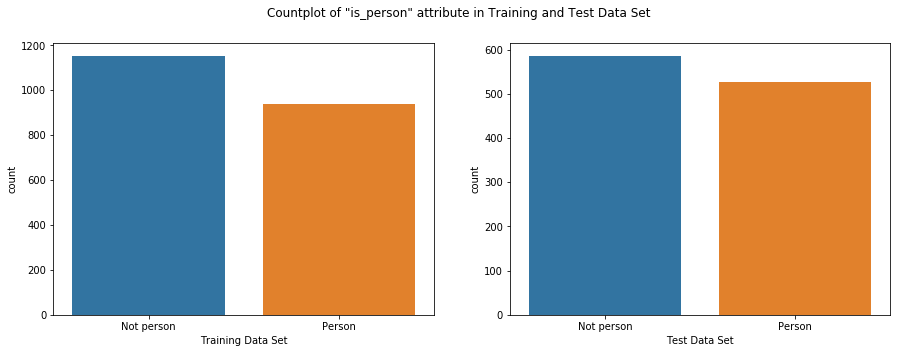

In [7]:
fig = plt.subplots(1,2,figsize=(15,5), sharex=False, sharey = False)

plt.subplot(1,2,1)
ax1 = sns.countplot(x='is_person',data=train_A)
ax1.set_xticklabels(['Not person','Person'])
ax1.set_xlabel('Training Data Set')

plt.subplot(1,2,2)
ax2 = sns.countplot(x='is_person',data=test_A)
ax2.set_xticklabels(['Not person','Person'])
ax2.set_xlabel('Test Data Set')

plt.suptitle('Countplot of "is_person" attribute in Training and Test Data Set')

plt.show()

<div align="right"><font color="blue" size="4">2.0</font></div>

(c)    

    In the Training data set the count of Person class is 940 and Not Person is 1153.
    In the Test data set the count of Person class is 527 and Not Person is 586.
    
    Hence, the data is not skewed in favour of any particular class by a large margin.
    The classes ('Not Person' & 'Person') are nearly balanced in both test and training data sets.
    However, in both cases the count of the 'Not Person' class is higher than the 'Person' class. 
    Depending on the way the classification model is engineered, this could cause the classification 
    model to have a subtle bias towards the 'Not Person' class.
    
    
    Accuracy is a good metric when the target classes are nearly balanced. From the above countplots it can be
    concluded the classes are nearly balanced. Hence classification accuracy may indeed be a good metric for
    evaluating the performance of the classifiers.

<div align="right"><font color="blue" size="4">2.0</font></div>

## 2. Exploring Different Models for Classification

### ========== Question 2.1 --- [3 marks] ==========

As always, we wish to start with a very simple baseline classifier, which will provide a sanity check when training more advanced models.

&nbsp;&nbsp;**(a)** [Text] Define a baseline classifier (indicate why you chose it/why it is relevant).<br>
&nbsp;&nbsp;**(b)** [Code] Report the accuracy such a classifier would achieve on the testing set.

<div align="right"><font color="blue" size="4">3.0/3.0</font></div>

(a) The baseline classifier is a DummyClassifier with strategy='most_frequent'. This strategy always predicts the class label from the class with the most number of observations.

This is relevant, because if the classifier reports the class label, based on the most frequently occuring class label in the dataset, then this provides a sanity check and a baseline for the other models experimented later. 

<div align="right"><font color="blue" size="4">2.0</font></div>

In [12]:
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_tr,y_tr)
print('The dummy classifier has an accuracy of ',round(dummy.score(X_tst,y_tst),3),' on the test data set')
# print('The dummy classifier has accuracy: {:.3f} on the validation set.'.format(dummy.score(X_tst,y_tst)))

The dummy classifier has an accuracy of  0.527  on the test data set


<div align="right"><font color="blue" size="4">1.0</font></div>

### ========== Question 2.2 --- [9 marks] ==========
<a id='question2_2'></a>
Let us now train a more advanced Model.

&nbsp;&nbsp;**(a)** [Code] Train a [`LogisticRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier using default settings, except for the `solver` parameter which you should set to `lbfgs`. Report the classification accuracy score on the testing set.<br>
&nbsp;&nbsp;**(b)** [Text] Comment on the performance of the Logistic Regressor in comparison with the baseline model.<br>
&nbsp;&nbsp;**(c)** [Code] Visualise the errors using an appropriate method to justify your answer to (b).<br>
&nbsp;&nbsp;**(d)** [Text] Referring back to the observations in [Q1.1](#question1_1), and assuming that we know that the features should be informative, why do you think this may be happening?<br>

<div align="right"><font color="blue" size="4">5.0/9.0</font></div>

In [13]:
logistic = LogisticRegression(solver='lbfgs')
logistic.fit(X_tr,y_tr)
y_deduced = logistic.predict(X_tst)
print('The classifier has an accuracy of ',round(logistic.score(X_tst,y_tst),3),' on the test data set')

The classifier has an accuracy of  0.527  on the test data set


<div align="right"><font color="blue" size="4">2.0</font></div>

(b) On comparing the accuracy values rounded to 3 decimal places, the accuracy of the LogisticRegression classifier and baseline classifier is equal. This suggests a very unsatisfactory performance by the LogisticRegression classifier.

<div align="right"><font color="blue" size="4">1.0</font></div>

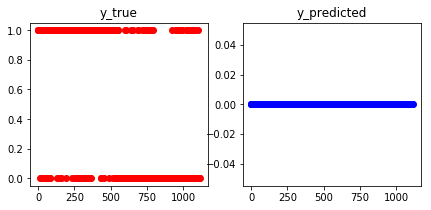

The confusion matrix
[[586   0]
 [527   0]]


In [14]:
# confusion_matrix(y_true, y_pred)
# print(y_deduced)
# confusion_matrix(y_tst, y_deduced)
fig = plt.subplots(1,2,figsize=(7,3), sharex=False, sharey = False)
plt.subplot(1,2,1)
plt.title('y_true')
ax1 = plt.plot(y_tst,'ro')


plt.subplot(1,2,2)
plt.title('y_predicted')
ax2 = plt.plot(y_deduced,'bo')


plt.show()

print('The confusion matrix')
print(confusion_matrix(y_tst, y_deduced))

<div align="right"><font color="blue" size="4">1.0</font></div>

<div align="left"><font color="green" size="4">should be a Confusion matrix (plotted)</font></div>

(d) Assuming that all the features are informative this error in classification may be happening because we have not yet applied feature standardization to the features in the data set. According to Scikit learns' pre-processing data section, for many of the machine learning functions implemented in scikit, feature standardization is a requirement. That is the individual features need to have near standard normal distribution (Mean 0 and variance 1). Hence, the cause of the low accuracy may be because of the fact that no such standardization was implemented on any of the input features.

<div align="right"><font color="blue" size="4">1.0</font></div>

<div align="left"><font color="green" size="4">Dataset should be standardized (+2 points for explaining why -- not explained)</font></div>

### ========== Question 2.3 --- [13 marks] ==========

You should have noticed that the performance of the above logistic regressor is less than satisfactory. Let us attempt to fix this by preprocessing the inputs `X`.

&nbsp;&nbsp;**(a)** [Text] Before applying the processing, comment on whether you should base any parameters of the preprocessing on the training or testing set or both and what repurcussions this may have.<br>
&nbsp;&nbsp;**(b)** [Code] Following from your observations in [Q2.2.(d)](#question2_2), process the features in both the **training** as well as the **testing** sets accordingly. *Hint: There is an sklearn [package](http://scikit-learn.org/0.19/modules/preprocessing.html) which may be very useful.* <br>
&nbsp;&nbsp;**(c)** [Code] Now Train a Logistic Regressor on the transformed training set, keeping the same settings as in the previous question. Report the classification accuracy on the testing set and visualise the errors in a similar way to [Q2.2(c)](#question2_2). <br>
&nbsp;&nbsp;**(d)** [Text] Finally comment on the comparative performance with [Q2.2](#question2_2).

<div align="right"><font color="blue" size="4">12.0/13.0</font></div>

(a) We should base the parameters of the pre-processing on the training set and not on the testing set. The test data set should not be used as a basis for any parameter of the preprocessing because that would introduce extra information into the model from the test data. This kind of data leak can lead to the model overfitting the data.

<div align="right"><font color="blue" size="4">2.0</font></div>

In [19]:
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_tst_scaled = scaler.transform(X_tst)

<div align="right"><font color="blue" size="4">5.0</font></div>

The classifier has an accuracy of  0.6504941599281222  on the test data set


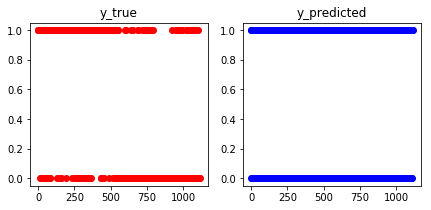

The confusion matrix
[[361 225]
 [164 363]]


In [20]:
logistic2 = LogisticRegression(solver='lbfgs')
logistic2.fit(X_tr_scaled,y_tr)
y_deduced = logistic.predict(X_tst_scaled)
print('The classifier has an accuracy of ',logistic.score(X_tst_scaled,y_tst),' on the test data set')
fig = plt.subplots(1,2,figsize=(7,3), sharex=False, sharey = False)
plt.subplot(1,2,1)
plt.title('y_true')
ax1 = plt.plot(y_tst,'ro')


plt.subplot(1,2,2)
plt.title('y_predicted')
ax2 = plt.plot(y_deduced,'bo')


plt.show()

print('The confusion matrix')
print(confusion_matrix(y_tst, y_deduced))

<div align="right"><font color="blue" size="4">3.0</font></div>

(d) There is a definite improvement in the performance of the classifier as the classifier accuracy has improved. All the predicted values no longer belong to the one class (class zero). From the confusion matrix it can be seen that the number of true positives have reduced from 586 to 361 (586 - 361 = 225), but simultaneously the number of true negatives have also increased from 0 to 363. 

<div align="right"><font color="blue" size="4">2.0</font></div>

### ========== Question 2.4 --- [18 marks] ==========
<a id='question2_4'></a>
So far we have used default settings for training the logistic regression classifier. Now we want to optimise the hyperparameters of the classifier, namely the regularisation parameter `C`. We will do this through [K-fold cross-validation](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.KFold.html). You should familiarise yourself with the interpretation of the `C` parameter.

&nbsp;&nbsp;**(a)** [Text] Why do we use cross-validation to optimise the hyper-parameters, rather than using the test-set?<br>
&nbsp;&nbsp;**(b)** [Code] Load the datasets `Images_B_Train.csv` and `Images_B_Test.csv` (this ensures everyone is using the same pre-processed data). Again, extract the relevant columns (`dim1` through `dim500` and the `is_person` class) from each dataset, and store into `X_train`/`X_test` and `y_train`/`y_test` variables.<br>
&nbsp;&nbsp;**(c)** [Code] Using Cross-Validation on the **Training** set (a 5-fold split should be sufficient: set `shuffle=True` and `random_state=0`), perform a search for the best value of `C` in the range `1e-5` to `1e5` (*Hint: the KFold [split](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold.split) method will come in handy*). Keep track of the validation-set accuracy per-fold for each value of `C` in an array. Think carefully about the best way to cover the search space: i.e. the step-lengths and number of steps.<br>
&nbsp;&nbsp;**(d)** [Code] Plot the mean and standard-deviation (across folds) of the accuracy as a function of `C`. *Hint: you may find the matplotlib's [errorbar](https://matplotlib.org/2.2.3/api/_as_gen/matplotlib.pyplot.errorbar.html) function useful. Be careful to use the correct scale on the x-axis.* Using the mean values, report the regularisation parameter with the best accuracy (alongside its accuracy): *N.B. Do not pick the optimal value "by hand", instead use an appropriate numpy function*.<br>
&nbsp;&nbsp;**(e)** [Text] Comment on the output, especially as regards the effect of the regularisation parameter (you should write between 3 and 4 sentences).<br>
&nbsp;&nbsp;**(f)** [Code] By using the optimal value (i.e. the one that yields the highest average K-Fold classification accuracy) train a new `LogisticRegression` classifier on the entire training set and report the classification accuracy on the test set.

**N.B.: Keep track of the KFold object you created as we will keep using it**

<div align="right"><font color="blue" size="4">17.0/18.0</font></div>

(a) We use cross-validation to optimize the hyperparameters because using the test-set to optimize the hyperparameters will cause the model to be optimized on the extra information introduced by the test data set. This kind of data leak can lead to the model overfitting the data.

<div align="right"><font color="blue" size="4">1.0</font></div>

In [21]:
train_B_DataPath = os.path.join(os.getcwd(),'datasets','Images_B_Train.csv')
train_B = pd.read_csv(train_B_DataPath)

test_B_DataPath = os.path.join(os.getcwd(),'datasets','Images_B_Test.csv')
test_B = pd.read_csv(test_B_DataPath)

B_attribute_list = list(test_B.columns[1:501])
B_attribute_list.append('is_person')
test_B = test_B[B_attribute_list]
train_B = train_B[B_attribute_list]

X_train = train_B.drop('is_person',inplace=False,axis=1)
X_test = test_B.drop('is_person',inplace=False,axis=1)
y_train = train_B['is_person']
y_test = test_B['is_person']

print('Shape of the training feature matrix is : ',X_train.shape)
print('Shape of the training class labels is: ',y_train.shape)
print('Shape of the testing feature matrix is: ',X_test.shape)
print('Shape of the testing class labels is: ',y_test.shape)

Shape of the training feature matrix is :  (2093, 500)
Shape of the training class labels is:  (2093,)
Shape of the testing feature matrix is:  (1113, 500)
Shape of the testing class labels is:  (1113,)


<div align="right"><font color="blue" size="4">2.0</font></div>

In [22]:
# Step lengths are equally spaced
num_interval = 100
num_of_folds = 5
cvgen = KFold(n_splits=num_of_folds, shuffle=True, random_state=0) # A 5 fold split object cross validation generator
# generates 100 (num_interval) equally spaces numbers in the range of base^-5 to base^5
c_candidates = np.logspace(-5, 5, num=num_interval, base=10) 
c_candidates_search_grid = np.zeros((num_of_folds, num_interval)) # matrix of fold_number * c_parameter
for i,c_candidate in enumerate(c_candidates):
    logistic = LogisticRegression(solver='lbfgs',C=c_candidate)
    score = cross_val_score(logistic,X_train,y_train,cv=cvgen)
    col = 0
    for fold in range(5):
            c_candidates_search_grid[fold][i] = score[fold]
print('The accuracy for each fold(row) and the c parameter(column) is\n')
print(c_candidates_search_grid)

The accuracy for each fold(row) and the c parameter(column) is

[[0.56563246 0.57279236 0.59188544 0.60620525 0.61575179 0.62052506
  0.62768496 0.65155131 0.65393795 0.65632458 0.66825776 0.66109785
  0.66109785 0.65871122 0.65393795 0.65632458 0.66348449 0.66587112
  0.66348449 0.67303103 0.67064439 0.67303103 0.68019093 0.67541766
  0.67541766 0.67541766 0.67064439 0.66587112 0.66348449 0.66825776
  0.67064439 0.6778043  0.67064439 0.66825776 0.66587112 0.65632458
  0.65632458 0.65632458 0.65632458 0.65871122 0.66109785 0.66109785
  0.66109785 0.65393795 0.65393795 0.65393795 0.65632458 0.65393795
  0.65393795 0.65155131 0.64916468 0.64916468 0.64916468 0.64916468
  0.64677804 0.64916468 0.64916468 0.64439141 0.64439141 0.64439141
  0.64439141 0.64439141 0.64439141 0.64200477 0.64200477 0.63961814
  0.64439141 0.63961814 0.64200477 0.64200477 0.63961814 0.63961814
  0.64439141 0.64200477 0.64200477 0.64439141 0.64200477 0.64200477
  0.64200477 0.64200477 0.64200477 0.64200477 0.6420

<div align="right"><font color="blue" size="4">6.0</font></div>

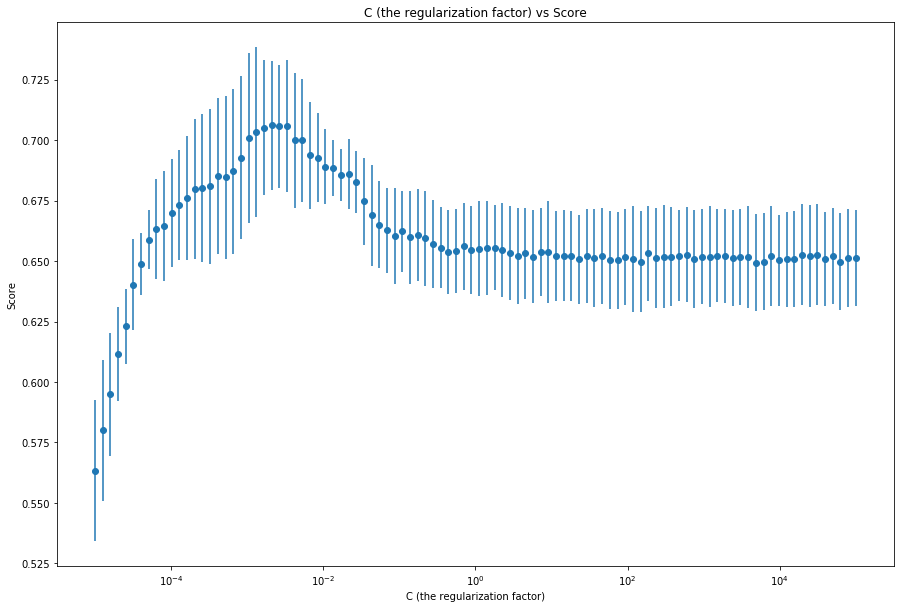

1. C (the regularization parameter) with the best accuracy is:  0.0021
2. The optimal accuracy is:  0.706


In [23]:
means = c_candidates_search_grid.mean(axis=0)
standard_deviations = c_candidates_search_grid.std(axis=0)
x = c_candidates
f = plt.figure(figsize=(15,10))
plt.errorbar(x, means, fmt='o', yerr=standard_deviations)
plt.xscale('log') 
plt.xlabel('C (the regularization factor)')
plt.ylabel('Score')
plt.title('C (the regularization factor) vs Score')
plt.show()

# report the regularisation parameter with the best accuracy (alongside its accuracy)
max_idx = means.argmax()
c_optimal = c_candidates[max_idx]
accuracy_optimal = means[max_idx]
print('1. C (the regularization parameter) with the best accuracy is: ', round(c_optimal,5))
print('2. The optimal accuracy is: ', round(accuracy_optimal,3))

<div align="right"><font color="blue" size="4">5.0</font></div>

(e) C the regularization parameter plays an important role in determining the accuracy of the LogisticRegression Classifier. According to the sci-kit learn documentation, C (the regularization parameter) is the strength regularization inverse. The parameter c plays a vital role in determing the performance of the classifier. Hence, without a doubt the choice of the regularization parameter C, plays a critical role in determining the effectiveness of the classifier.

<div align="right"><font color="blue" size="4">2.0</font></div>

In [24]:
logistic3 = LogisticRegression(solver='lbfgs',C=c_optimal)
logistic3.fit(X_train,y_train)
print('The classifier has an accuracy of ',round(logistic3.score(X_test,y_test),3),' on the test data set')

The classifier has an accuracy of  0.698  on the test data set


<div align="right"><font color="blue" size="4">1.0</font></div>

### ========== Question 2.5 --- (LEVEL 11) --- [12 marks] ==========

Let us attempt to validate the importance of the various features for classification. We could do this like we did for linear regression by looking at the magnitude of the weights. However, in this case, we will use the [`RandomForestClassifier`](http://scikit-learn.org/0.19/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to give us a ranking over features.

&nbsp;&nbsp;**(a)** [Text] How can we use the Random-Forest to get this kind of analysis? *Hint: look at the `feature_importances` property in the SKLearn implementation.*<br>
&nbsp;&nbsp;**(b)** [Code] Initialise a random forest classifier and fit the model by using training data only and 500 trees (i.e. `n_estimators=500`). Set `random_state=42` to ensure reproducible results and `criterion=entropy` but leave all other parameters at their default value. Report the accuracy score on both the training and testing sets.<br>
&nbsp;&nbsp;**(c)** [Text] Comment on the discrepancy between training and testing accuracies.<br>
&nbsp;&nbsp;**(d)** [Code] By using the random forest model display the names of the 10 most important features (in descending order of importance).<br>


<div align="right"><font color="blue" size="4">12.0/12.0</font></div>

(a) Random forest essentially comprise of several decision trees. A split on the data set occurs for every feature (represented by a node) in the decision tree. This spilt occurs such that the impurity measured in terms of entropy or gini index reduces. Hence for a particular tree   how much a feature reduces the impurity is recorded and for the entire forest this value is averaged across all the trees and then the features are  ranked according to the averages computed.

<div align="right"><font color="blue" size="4">4.0</font></div>

In [25]:
randomForest = RandomForestClassifier(n_estimators=500,random_state=42,criterion="entropy")
randomForest.fit(X_train,y_train)
print('The RandomForestClassifier has an accuracy of: ',round(randomForest.score(X_train,y_train),3) ,' on the training set')
print('The RandomForestClassifier has an accuracy of: ',round(randomForest.score(X_test,y_test),3) ,' on the testing set')

The RandomForestClassifier has an accuracy of:  1.0  on the training set
The RandomForestClassifier has an accuracy of:  0.701  on the testing set


<div align="right"><font color="blue" size="4">2.0</font></div>

(c) The discrepancy in the training data and testing data accuracy is due to the fact that the Random Forest Classifier model is built on the basis of the training set and not the test set. The classifier has been so constructed that it perfectly fits the training data (over-fitting). However, when the testing data is input to the model, its accuracy reduces because it was not trained on the test data and the test data might have some variances in the classification, useen previously in the training data. 

<div align="right"><font color="blue" size="4">3.0</font></div>

In [26]:
no_of_top_features = 10
features = X_train.columns
sorted_indices = randomForest.feature_importances_.argsort()[-no_of_top_features:][::-1]
print('The', no_of_top_features ,'most important features sorted in descending order are')
# print(randomForest.feature_importances_[sorted_indices])
for i,index in enumerate(sorted_indices): 
    if (i < 9):   
        print(i+1,'  ',features[index])  # if else used for pretty formatting
    else:
        print(i+1,' ',features[index])

The 10 most important features sorted in descending order are
1    dim51
2    dim21
3    dim360
4    dim479
5    dim461
6    dim4
7    dim283
8    dim76
9    dim398
10   dim217


<div align="right"><font color="blue" size="4">3.0</font></div>

### ========== Question 2.6 --- [12 marks] ==========

We would like now to explore another form of classifier: the Support Vector Machine. A key decision in training SVM's is what kind of kernel to use. We will explore with three kernel types: linear, radial-basis-functions and polynomials. To get a feel for each we will first visualise typical decision boundaries for each of these variants. To do so, we have to simplify our problem to two-dimensional input (to allow us to visualise it).

&nbsp;&nbsp;**(a)** [Code] Using the training set only, create a training `X` matrix with only the `dim21` and `dim51` columns. ***N.B.*** *Python (and numpy) use zero-based indexing*. Then train three distinct classifiers on this 2D data. Use a `linear` kernel for one, an `rbf` kernel for another (set `gamma='auto'`) and a second order (`degree`) polynomial kernel for the other. Set `C=1` in all cases. Using the function `plot_SVM_DecisionBoundary` from our own library (it exists under the `plotters` module), plot the decision boundary for all three classifiers.<br>
&nbsp;&nbsp;**(b)** [Text] Explain (intuitively) the shape of the decision boundary for each classifier (i.e. comment on what aspect of the kernel gives rise to it). Use this to comment on how it relates to classification accuracy.

<div align="right"><font color="blue" size="4">7.0/12.0</font></div>

Training on Linear Kernel
Training on RBF kernel
Training on Second order degree kernel


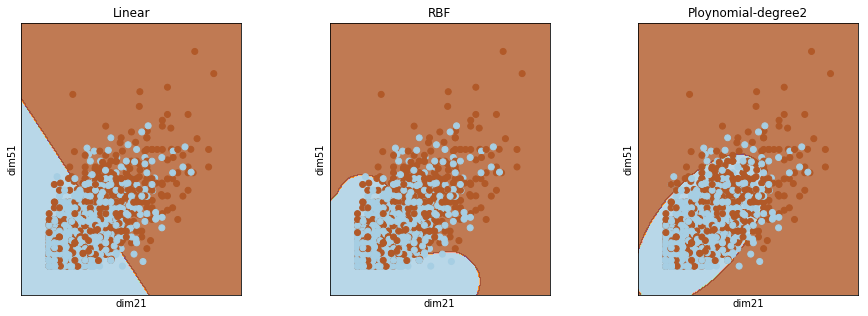

In [27]:
features = ['dim21','dim51']
X = X_train[features]
linearKernel = SVC(kernel='linear',C=1)
linearKernel.fit(X,y_train)
print('Training on Linear Kernel')
rbfKernel = SVC(kernel='rbf',gamma='auto',C=1)
rbfKernel.fit(X,y_train)
print('Training on RBF kernel')
degreeKernel = SVC(kernel='poly',degree=2,C=1)
degreeKernel.fit(X,y_train)
print('Training on Second order degree kernel')
X = X.values
kernels = [linearKernel,rbfKernel,degreeKernel] 
kernel_titles = ['Linear','RBF','Ploynomial-degree2']
plotter.plot_SVM_DecisionBoundary(kernels,X,y_train,kernel_titles,features)


<div align="right"><font color="blue" size="4">5.0</font></div>

(b) Thes shapes of the decision boundaries are determined by the functions (linear,rbf or polynomial) used by the SVM kernel for classification. From the graphs of plot_SVM_DecisionBoundary the shape of the decision boundary for the linear function SVM classifier is a straight line. This is indeed the expected shape of the decision boundary for a linear SVM classifier. The shapes of the decision boundaries for radial basis and polynomial degree based SVM classifiers will be a curve along the 2D plane and this behavior is again observable from the graphs. 

The decision boundary in this case divides the plane into two regions. It classifies all the observations belonging to one of the regions to a particular class and all other points lying outside the region to another class. The shape of the decision boundary is crucial, as the best shape aims to divide the plane in such a way that all points belonging to one class lie in one region of the plane and the rest in the other region. Hence, the accuracy of the model is based on the correct number of points that the decision boundary encloses, based on its class.

<div align="right"><font color="blue" size="4">2.0</font></div>

<div align="left"><font color="green" size="4">Students should state that there is actually a 3D figure embedded, and for each plot explain how this leads to the shapes of the boundaries (not just describe the observed shapes)</font></div>

### ========== Question 2.7 --- [14 marks] ==========
Let us now explore the polynomial SVM further. We will go back to using the **FULL** dataset (i.e. the one we loaded in [Question 2.4](#question2_4)). There are two parameters we need to tune: the order of the polynomial and the regression coefficient. We will do this by way of a grid-search over parameters. To save computational time, we will use a constrained search space:

&nbsp;&nbsp;**(a)** [Code] Define an appropriate search space for `C` in the range `1e-2` to `1e3` using 6-steps (think about the step-size), and for the `degree` in the range 1 through 5 inclusive (5 steps). Using the `K-fold` iterator from [Q2.5](#question2_4), optimise the values for `C` and the `degree` in the above specified range. Keep track of the mean cross-validation accuracy for each parameter combination.<br>
&nbsp;&nbsp;**(b)** [Code] Using a seaborn heatmap, plot the fold-averaged classification accuracy for each parameter combination (label axes appropriately). Finally also report the combination of the parameters which yielded the best accuracy.<br>
&nbsp;&nbsp;**(c)** [Code] Retrain the (polynomial-kernel) SVC using the optimal parameters found in **(b)** and report its accuracy on the **Testing** set.<br>
&nbsp;&nbsp;**(d)** [Text] Explain the results relative to the Logistic Classifier.

<div align="right"><font color="blue" size="4">12.0/14.0</font></div>

In [28]:
# Step lengths are equally spaced
# generates 6 (num_interval) equally spaces numbers in the range of base^-2 to base^3
num_interval = 6
c_candidates_SVM = np.logspace(-2, 3, num=num_interval, base=10) 
# Return equally spaced numbers over the interval.
degree_interval = 5
degree_SVM = np.linspace(1,5,num=degree_interval)
fold = 5
# a search space grid of degree*c_candidates_SVM*fold
search_space_grid = np.zeros((degree_interval,num_interval,fold))
for i,degree in enumerate(degree_SVM):
    for j,c_candidate_SVM in enumerate(c_candidates_SVM):
        degreeKernel = SVC(kernel='poly', degree=degree, C=c_candidate_SVM)
        score = cross_val_score(degreeKernel,X_train,y_train,cv=cvgen)
        search_space_grid[i][j] = score

<div align="right"><font color="blue" size="4">5.0</font></div>

The highest accuracy on training set is:  0.695
The parameters that yielded the highest accuracy are
Value of C:  1.0
Optimal degree of the polynomial:  1.0


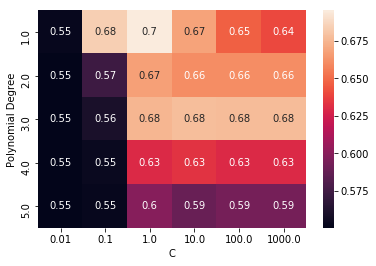

In [29]:
best_degree = -1
best_c= -1
best_score = -1
df_means = np.zeros((degree_interval,num_interval))
for i,degree in enumerate(degree_SVM):
    for j,c in enumerate(c_candidates_SVM):
        scores = search_space_grid[i][j]
        meanScore = np.mean(scores)
        df_means[i][j] = meanScore
        if (meanScore > best_score):
            best_score = meanScore
            best_degree = degree
            best_c = c

print('The highest accuracy on training set is: ',round(best_score,3))
print('The parameters that yielded the highest accuracy are')            
print('Value of C: ',best_c)
print('Optimal degree of the polynomial: ',best_degree)
# print(df_means)
sns.heatmap(data=df_means,xticklabels=c_candidates_SVM, yticklabels= degree_SVM, annot=True)
plt.xlabel('C')
plt.ylabel('Polynomial Degree')
plt.show()

<div align="right"><font color="blue" size="4">4.0</font></div>

In [30]:
degreeKernel2 = SVC(kernel='poly',degree=best_degree,C=best_c)
degreeKernel2.fit(X_train,y_train)
print('The SVM classifier with polynomial kernel has an accuracy of ',round(degreeKernel2.score(X_test,y_test),3),' on the test data set')

The SVM classifier with polynomial kernel has an accuracy of  0.694  on the test data set


<div align="right"><font color="blue" size="4">2.0</font></div>

(d) The SVM classifier with polynomial kernel has an accuracy of  0.694  on the test data set
and the logistic classifier has an accuracy of  0.698 on the test data set. Hence the accuracies of the logistic regressor and SVM classifier are comparable and nearly the same in this experimental set up. 

<div align="right"><font color="blue" size="4">1.0</font></div>

### ========== Question 2.8 --- (LEVEL 11) --- [10 marks] ==========

Answer the followign theoretical questions:

&nbsp;&nbsp;**(a)** [Text] Is a Logistic Regression Classifier equivalent to an SVM with a Linear Kernel? why or why not?<br>
&nbsp;&nbsp;**(b)** [Text] In the previous question we optimised the `degree` and regularisation `C` simultaneously. By looking at the heatmap you plotted, can you explain the motivation behind this? That is, what would happen if we were to estimate the optimum along each dimension independently? Can you imagine a case where an independent search along each of the dimensions (known as coordinate-descent) would be guaranteed to yield the optimum result?<br>
&nbsp;&nbsp;**(c)** [Text] Despite having a hold-out testing set, we used cross-validation for optimising the hyper-parameters (only using the testing set for comparing models). Why is this? Also, mention an advantage and a disadvantage of using cross-validation to train hyper-parameters rather than a further train/validation split.

<div align="right"><font color="blue" size="4">8.0/10.0</font></div>

(a) No, a logistic regression classifier is not equivalent to an SVM with linear kernel because 
1. The loss function for both the classifiers is different. Logistic regression minimizes 'logistic loss' and SVM minimizes 'hinge loss'. 
2. SVM produces absolute values either 0 or 1 whereas logistic regression produces values that are probabilistic.
3. Because of the underlying cost function, the Logistic regression in many cases is more sensitive to outliers, than SVM 

<div align="right"><font color="blue" size="4">3.0</font></div>

(b) On observing the first row of the heatmap  (which corresponds to the accuracy across the first-degree polynomial) it can be seen that the accuracy first increases and achieves max (in row 1 the max is 0.7) and then decreases. This behavior repeats across all the rows of the heat map. 
On observing the first column of the heat map we observe that the values are a constant, in the second column the values decrease monotonically and observing the other columns as well we see that there are no uniform general trends across all the columns. 
Hence to optimize the hyper-parameters 'C' and 'degree' simultaneously, it will be best to choose those values which maximize the accuracy across all the rows and column in the heatmap. 

Yes, if we know the optimal value of c then keeping that constant we can vary the degree of the polynomial to find the optimal degree (the one that yield the highest accuracy).
Similarly, if we are aware of the optimal degree then keeping that constant we can vary the value of C to find the optimal C (the one that yields the highest accuracy).

<div align="right"><font color="blue" size="4">2.0</font></div>

(c) We use cross validation for optimising the parameters despite having a hold-out testing set because:
This way no extra information from the test data set is introduced into the model and our model is hence built on observation from the trainig set alone. If we used the test set to also build the model, then this kind of data leak can lead to the model overfitting the data. 
Since kfold averages across the entire training model, the final result is an averaged result across several parts of the data set.

Advantage:
It introduces no extra information to the model and reports an averaged result.

Disadvantage:
Requires more compute resource and large training time.

<div align="right"><font color="blue" size="4">3.0</font></div>

# Appendix
## More information about visual words

The Visual words used in this project are based on [Scale-invariant feature transforms (SIFT)](https://en.wikipedia.org/wiki/Scale-invariant_feature_transform). SIFT features are essentially local orientation histograms and capture the properties of small image regions. They possess attractive invariance properties which make them well suited for our task (you can read more about SIFT features in [D.Lowe, IJCV 60(2):91- 110, 2004](http://link.springer.com/article/10.1023/B:VISI.0000029664.99615.94), but the details don't matter for the purpose of this assignment). Each SIFT feature is a 128 dimensional vector. From each image many SIFT features are extracted, typically > 2500 per image (features are extracted at regular intervals using a 15 pixel grid and at 4 different scales). To obtain visual words a representative subset of all extracted SIFT features from all images is chosen and clustered with k-means using 500 centres (such use of the k-means algorithm will be discussed in detail during the lecture). These 500 cluster centres form our visual words. The representation of a single image is obtained by first assigning each SIFT feature extracted from the image to the appropriate cluster (i.e. we determine the visual word corresponding to each feature by picking the closest cluster centre). We then count the number of features from that image assigned to each cluster (i.e. we determine how often each visual word is present in the image). This results in a 500 dimensional count vector for each image (one dimension for each visual word). The normalized version of this count vector gives the final representation of the image (normalized means that we divide the count vector by the total number of visual words in the image, i.e. the normalized counts sum to 1 for each image)